<a href="https://colab.research.google.com/github/silva-felipe/BootCamp_Alura_DataScience/blob/main/Projeto_modulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

sns.set()

- Formatando a visuzalisão dos dados para valores altos

In [2]:
pd.options.display.float_format = "{:.2f}".format

# Dados óbitos

- Carregando os dados de **óbitos** por complexidade de atendimento
- Configurando para a coluna "Unidade da Federação" ser meu index

In [3]:
obitos = pd.read_csv('/content/obitos_complexidade.csv', sep=';', encoding='ISO-8859-1', skiprows=3, skipfooter=12)
obitos = obitos.set_index('Unidade da Federação')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


- Transformando meu index em uma lista para poder manipula-lo, uma vez que o index é imutável

- Realizando um looping para Identificar a qual região do país o estado se localiza

In [4]:
index = obitos.index.to_list()

regiao = []
for i in index:
  if int(i[:2]) < 20:
    regiao.append('Norte')
  elif 20 < int(i[:2]) < 30:
    regiao.append('Nordeste')
  elif 30 < int(i[:2]) < 40:
    regiao.append('Sudeste')
  elif 40 < int(i[:2]) < 50:
    regiao.append('Sul')
  else:
    regiao.append('Centro-Oeste')

regiao

['Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Sudeste',
 'Sudeste',
 'Sudeste',
 'Sudeste',
 'Sul',
 'Sul',
 'Sul',
 'Centro-Oeste',
 'Centro-Oeste',
 'Centro-Oeste',
 'Centro-Oeste']

- Criando uma coluna com os valores da região de cada estado

In [5]:
obitos['Região'] = regiao

- Fatiando o index para retirar o numero na frente do estado

In [6]:
obitos.index = obitos.index.str.slice(3,)

- visualizando os dados configurados

In [7]:
obitos

,Média complexidade,Alta complexidade,Total,Região
Unidade da Federação,,,,
Rondônia,35772,1286,37058,Norte
Acre,18175,440,18615,Norte
Amazonas,60013,4950,64963,Norte
Roraima,11778,688,12466,Norte
Pará,131474,8117,139591,Norte
Amapá,12507,498,13005,Norte
Tocantins,31483,2231,33714,Norte
Maranhão,109328,4171,113499,Nordeste
Piauí,71346,4396,75742,Nordeste


# Dados internações

- Carregando os dados de **internações** por complexidade de atendimento
- Configurando para a coluna "Unidade da Federação" ser meu index

In [8]:
internacoes = pd.read_csv('/content/internacoes_complexidade.csv', sep=';', encoding='ISO-8859-1', skiprows=3, skipfooter=12)
internacoes = internacoes.set_index('Unidade da Federação')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


- Reutilizar o index de 'obitos' e o loop a lista de região criada para criar a minha coluna 'Região' em 'internacoes'


In [9]:
internacoes['Região'] = regiao

- Fatiando o index para retirar o numero na frente do estado

In [10]:
internacoes.index = internacoes.index.str.slice(3,)

- Visualizando os dados configurados

In [11]:
internacoes

,Média complexidade,Alta complexidade,Não se aplica,Total,Região
Unidade da Federação,,,,,
Rondônia,1359939,27201,-,1387140,Norte
Acre,626252,10817,-,637069,Norte
Amazonas,2180671,68083,-,2248754,Norte
Roraima,459073,6916,-,465989,Norte
Pará,6362298,116777,-,6479075,Norte
Amapá,470555,8113,-,478668,Norte
Tocantins,1131697,45626,-,1177323,Norte
Maranhão,5255569,118786,-,5374355,Nordeste
Piauí,2769915,101973,-,2871888,Nordeste


# Dados valor total

- Carregando os dados de **valor total** por complexidade de atendimento
- Configurando para a coluna "Unidade da Federação" ser meu index

In [12]:
valor_total = pd.read_csv('/content/valor_total_complexidade.csv', sep=';', encoding='ISO-8859-1', skiprows=3, skipfooter=12, thousands='.', decimal=',')
valor_total = valor_total.set_index('Unidade da Federação')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


- Reutilizar o index de 'obitos' e o loop a lista de região criada para criar a minha coluna 'Região' em 'internacoes'

In [13]:
valor_total['Região'] = regiao

- Fatiando o index para retirar o numero na frente do estado

In [14]:
valor_total.index = valor_total.index.str.slice(3,)

- Visualizando os dados configurados

In [15]:
valor_total

,Média complexidade,Alta complexidade,Não se aplica,Total,Região
Unidade da Federação,,,,,
Rondônia,918067773.93,78343480.75,-,996411254.68,Norte
Acre,403217264.72,46831265.75,-,450048530.47,Norte
Amazonas,1646127198.16,271120737.89,-,1917247936.05,Norte
Roraima,315072912.86,13804052.23,-,328876965.09,Norte
Pará,4095809713.12,609499289.17,-,4705309002.29,Norte
Amapá,262305270.35,47554822.24,-,309860092.59,Norte
Tocantins,854014431.90,166013840.74,-,1020028272.64,Norte
Maranhão,3369546454.95,501523043.09,-,3871069498.04,Nordeste
Piauí,1838155654.50,442733148.24,-,2280888802.74,Nordeste


# groupby

In [16]:
regioes = valor_total.groupby(['Região']).sum().drop('Total', axis=1)

In [17]:
regioes

,Média complexidade,Alta complexidade
Região,,
Centro-Oeste,9101935424.95,2968705642.08
Nordeste,30203865197.67,9639969956.57
Norte,8494614565.04,1233167488.77
Sudeste,53719811696.32,21838770897.67
Sul,22570168655.16,12710746911.75


In [18]:
x = regioes.sort_values(by='Média complexidade',ascending=False).index.tolist()
y = regioes['Média complexidade'].sort_values(ascending=False)

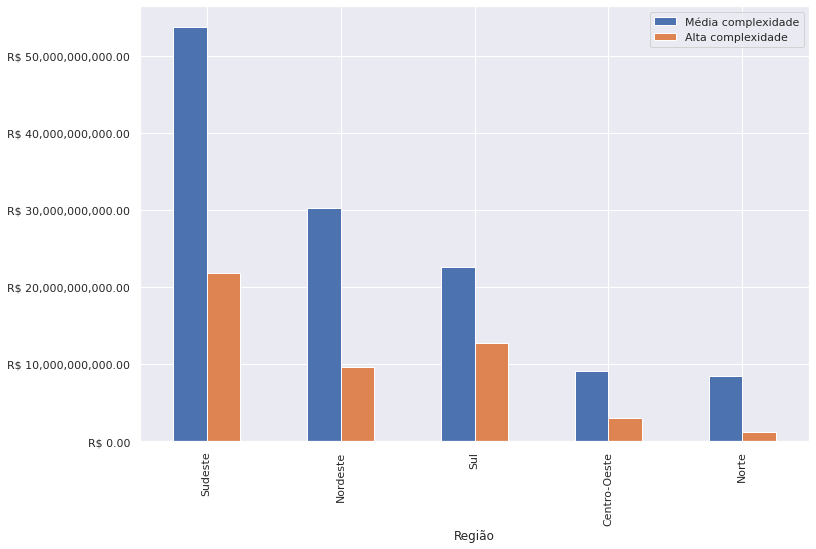

In [19]:
ax1 = regioes.sort_values(by='Média complexidade', ascending=False).plot(kind='bar', figsize=(12,8))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.show()

- Internações

In [20]:
internacoes_regiao = internacoes.groupby(['Região']).sum().drop('Total', axis=1)

In [21]:
internacoes_regiao

,Média complexidade,Alta complexidade
Região,,
Centro-Oeste,11070015,580506
Nordeste,38758443,1983660
Norte,12590485,283533
Sudeste,54065017,4249511
Sul,23356007,2432657


In [22]:
x = internacoes_regiao.sort_values(by='Média complexidade',ascending=False).index.tolist()
y = internacoes_regiao['Média complexidade'].sort_values(ascending=False)

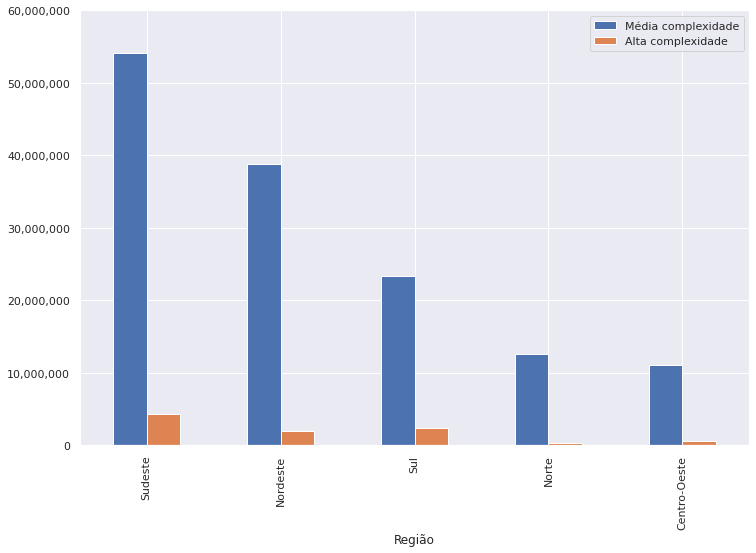

In [23]:
ax2 = internacoes_regiao.sort_values(by='Média complexidade', ascending=False).plot(kind='bar', figsize=(12,8))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.set_ylim(0,60*1e6)
plt.show()

In [24]:
obitos_regiao = obitos.groupby(['Região']).sum().drop('Total', axis=1)

In [25]:
obitos_regiao

,Média complexidade,Alta complexidade
Região,,
Centro-Oeste,362834,23680
Nordeste,1295328,83279
Norte,301202,18210
Sudeste,2768286,168655
Sul,1028603,91848


In [26]:
x = obitos_regiao.sort_values(by='Média complexidade',ascending=False).index.tolist()
y = obitos_regiao['Média complexidade'].sort_values(ascending=False)

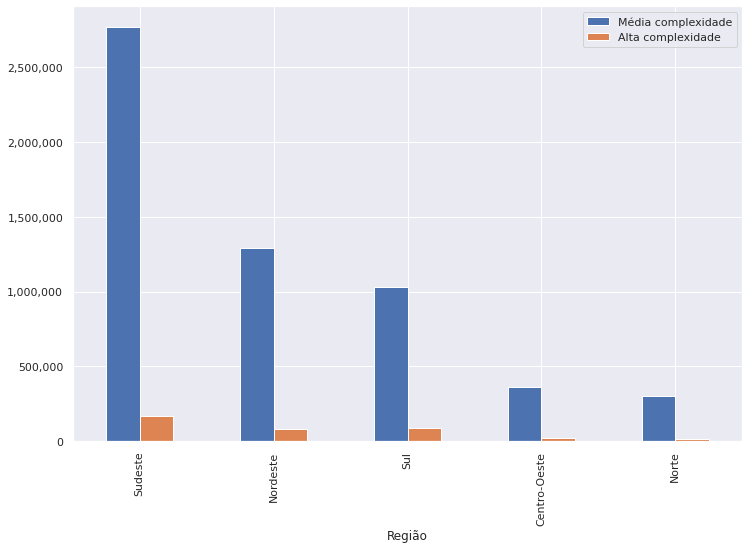

In [27]:
ax3 = obitos_regiao.sort_values(by='Média complexidade', ascending=False).plot(kind='bar', figsize=(12,8))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

In [28]:
internacoes_regiao

,Média complexidade,Alta complexidade
Região,,
Centro-Oeste,11070015,580506
Nordeste,38758443,1983660
Norte,12590485,283533
Sudeste,54065017,4249511
Sul,23356007,2432657


In [29]:
obitos_regiao

,Média complexidade,Alta complexidade
Região,,
Centro-Oeste,362834,23680
Nordeste,1295328,83279
Norte,301202,18210
Sudeste,2768286,168655
Sul,1028603,91848


In [30]:
mortalidade_internacao = (obitos_regiao * 100) / internacoes_regiao

In [31]:
mortalidade_internacao

,Média complexidade,Alta complexidade
Região,,
Centro-Oeste,3.28,4.08
Nordeste,3.34,4.20
Norte,2.39,6.42
Sudeste,5.12,3.97
Sul,4.40,3.78


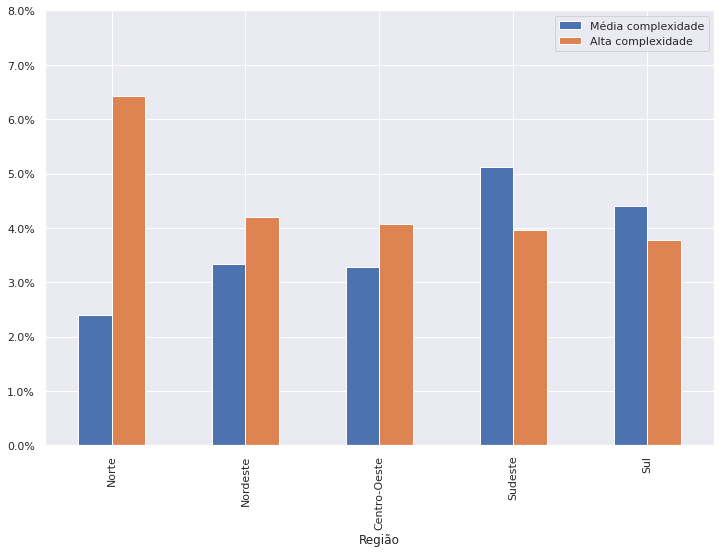

In [32]:
ax4 = mortalidade_internacao.sort_values(by='Alta complexidade', ascending=False).plot(kind='bar', figsize=(12,8))
ax4.yaxis.set_major_formatter(ticker.PercentFormatter())
ax4.set_ylim(0,8)
plt.show()

In [33]:
norte_internacoes = internacoes[internacoes['Região'] == 'Norte'].drop(['Total','Não se aplica','Região'], axis=1).sort_values('Média complexidade', ascending=False)

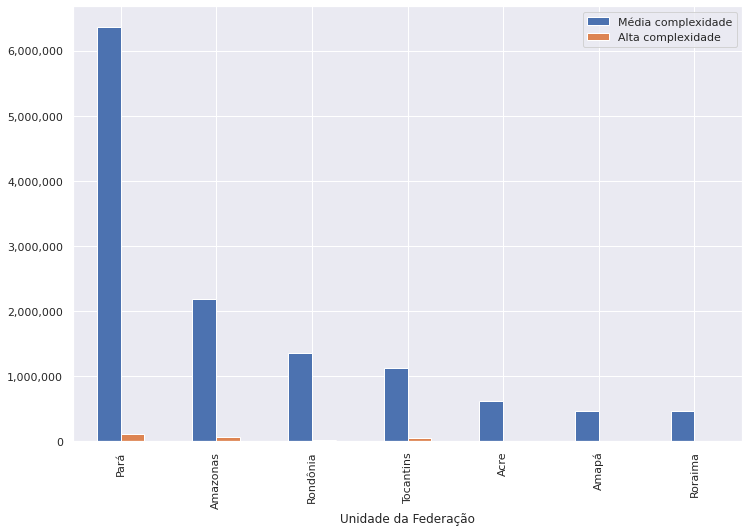

In [34]:
ax5 = norte_internacoes.plot(kind='bar', figsize=(12,8))
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

- Internações regiões

In [83]:
regioes_internacoes = internacoes_regiao.sort_values(by='Média complexidade', ascending=False)

In [93]:
norte_internacoes = internacoes[internacoes['Região'] == 'Norte'].drop(['Total','Não se aplica','Região'], axis=1).sort_values('Média complexidade', ascending=False)

In [36]:
nordeste_internacoes = internacoes[internacoes['Região'] == 'Nordeste'].drop(['Total','Não se aplica','Região'], axis=1).sort_values('Média complexidade', ascending=False)

In [37]:
sul_internacoes = internacoes[internacoes['Região'] == 'Sul'].drop(['Total','Não se aplica','Região'], axis=1).sort_values('Média complexidade', ascending=False)

In [38]:
sudeste_internacoes = internacoes[internacoes['Região'] == 'Sudeste'].drop(['Total','Não se aplica','Região'], axis=1).sort_values('Média complexidade', ascending=False)

In [39]:
centro_internacoes = internacoes[internacoes['Região'] == 'Centro-Oeste'].drop(['Total','Não se aplica','Região'], axis=1).sort_values('Média complexidade', ascending=False)

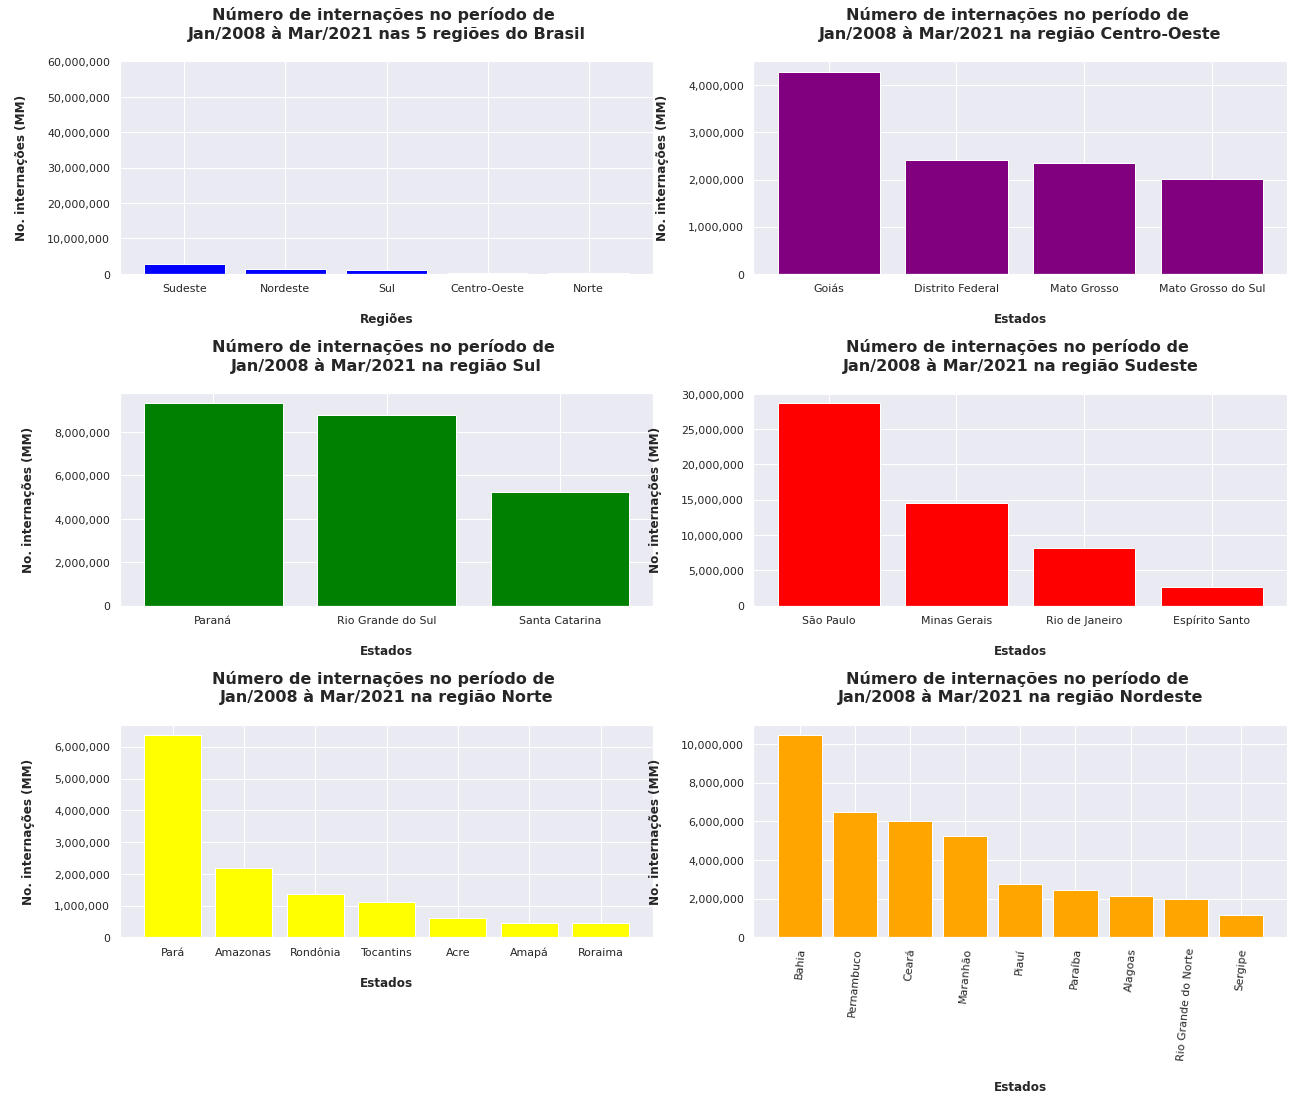

In [40]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1)
x_inter = internacoes_regiao.sort_values(by='Média complexidade',ascending=False).index.tolist()
y_inter = internacoes_regiao['Média complexidade'].sort_values(ascending=False)
ax1.bar(x,y, color='blue')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax1.set_ylim(0,60*1e6)
fig.tight_layout(pad=10)
ax1.set_title('Número de internações no período de \nJan/2008 à Mar/2021 nas 5 regiões do Brasil\n', weight='bold', fontsize=16)
ax1.set_xlabel('\nRegiões', weight='bold')
ax1.set_ylabel('No. internações (MM)\n', weight='bold')

ax2 = fig.add_subplot(3,2,2)
x_cen = centro_internacoes.sort_values(by='Média complexidade',ascending=False).index.tolist()
y_cen = centro_internacoes['Média complexidade'].sort_values(ascending=False)
ax2.bar(x_cen, y_cen, color='purple')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.set_title('Número de internações no período de \nJan/2008 à Mar/2021 na região Centro-Oeste\n', weight='bold', fontsize=16)
ax2.set_xlabel('\nEstados', weight='bold')
ax2.set_ylabel('\nNo. internações (MM)\n', weight='bold')

ax3 = fig.add_subplot(3,2,3)
x_sul = sul_internacoes.sort_values(by='Média complexidade',ascending=False).index.tolist()
y_sul = sul_internacoes['Média complexidade'].sort_values(ascending=False)
ax3.bar(x_sul, y_sul, color='green')
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax3.set_title('Número de internações no período de \nJan/2008 à Mar/2021 na região Sul\n', weight='bold', fontsize=16)
ax3.set_xlabel('\nEstados', weight='bold')
ax3.set_ylabel('\nNo. internações (MM)\n', weight='bold')

ax4 = fig.add_subplot(3,2,4)
x_sud = sudeste_internacoes.sort_values(by='Média complexidade',ascending=False).index.tolist()
y_sud = sudeste_internacoes['Média complexidade'].sort_values(ascending=False)
ax4.bar(x_sud, y_sud, color='red')
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax4.set_title('Número de internações no período de \nJan/2008 à Mar/2021 na região Sudeste\n', weight='bold', fontsize=16)
ax4.set_xlabel('\nEstados', weight='bold')
ax4.set_ylabel('\nNo. internações (MM)\n', weight='bold')

ax5 = fig.add_subplot(3,2,5)
x_nor = norte_internacoes.sort_values(by='Média complexidade',ascending=False).index.tolist()
y_nor = norte_internacoes['Média complexidade'].sort_values(ascending=False)
ax5.bar(x_nor, y_nor,color='yellow')
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax5.set_title('Número de internações no período de \nJan/2008 à Mar/2021 na região Norte\n', weight='bold', fontsize=16)
ax5.set_xlabel('\nEstados', weight='bold')
ax5.set_ylabel('\nNo. internações (MM)\n', weight='bold')

ax6 = fig.add_subplot(3,2,6)
x_nord = nordeste_internacoes.sort_values(by='Média complexidade',ascending=False).index.tolist()
y_nord = nordeste_internacoes['Média complexidade'].sort_values(ascending=False)
ax6.bar(x_nord, y_nord, color='orange')
ax6.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation=85)
ax6.set_title('Número de internações no período de \nJan/2008 à Mar/2021 na região Nordeste\n', weight='bold', fontsize=16)
ax6.set_xlabel('\nEstados', weight='bold')
ax6.set_ylabel('\nNo. internações (MM)\n', weight='bold')

plt.show()

In [41]:
data = internacoes.drop(['Não se aplica','Total','Região'], axis=1)
data

,Média complexidade,Alta complexidade
Unidade da Federação,,
Rondônia,1359939,27201
Acre,626252,10817
Amazonas,2180671,68083
Roraima,459073,6916
Pará,6362298,116777
Amapá,470555,8113
Tocantins,1131697,45626
Maranhão,5255569,118786
Piauí,2769915,101973


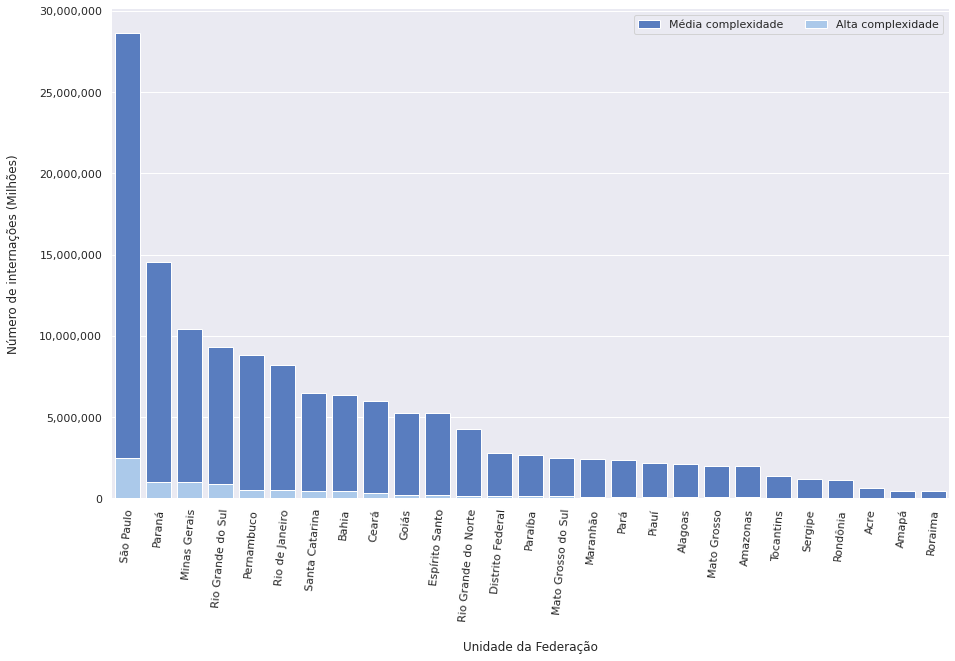

In [42]:
f, ax = plt.subplots(figsize=(15, 9))

sns.set_color_codes("muted")
sns.barplot(data=data.sort_values(by='Média complexidade', ascending=False), 
            x=data.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=data.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=data.sort_values(by='Alta complexidade', ascending=False), 
            x=data.sort_values(by='Alta complexidade', ascending=False).index.tolist(), 
            y='Alta complexidade', 
            color='b',
            label=data.columns[1])

plt.xticks(rotation=85)

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Número de internações (Milhões)\n",
       xlabel="\nUnidade da Federação")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

plt.show()

In [81]:
internacoes_regiao.sort_values(by='Média complexidade', ascending=False)

,Média complexidade,Alta complexidade
Região,,
Sudeste,54065017,4249511
Nordeste,38758443,1983660
Sul,23356007,2432657
Norte,12590485,283533
Centro-Oeste,11070015,580506


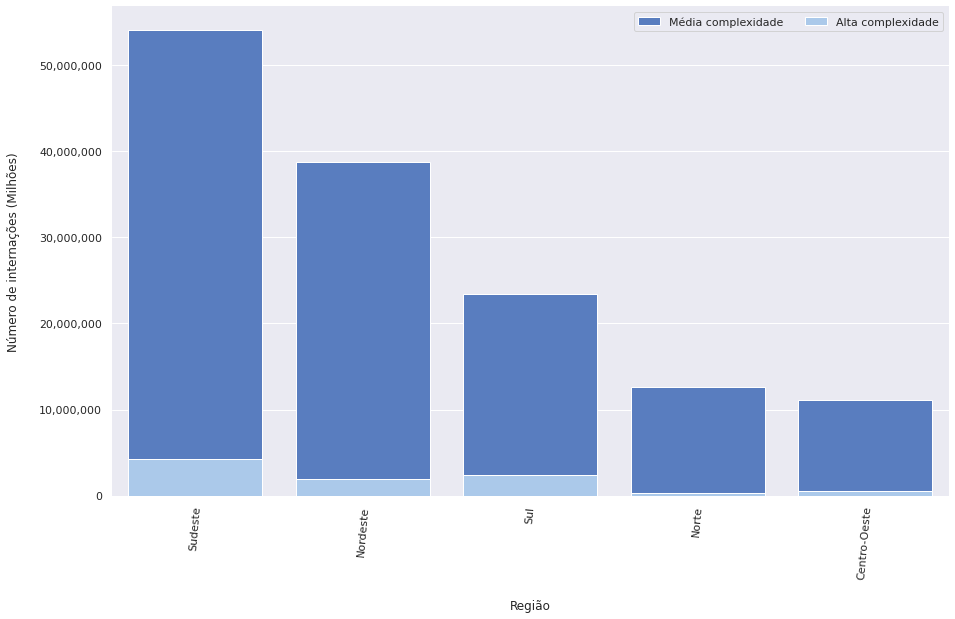

In [84]:
f2, ax2 = plt.subplots(figsize=(15, 9))

sns.set_color_codes("muted")
sns.barplot(data=regioes_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=regioes_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=internacoes_regiao.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=regioes_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=regioes_internacoes.index.tolist(), 
            y=regioes_internacoes['Alta complexidade'].values, 
            color='b',
            label=internacoes_regiao.columns[1])

plt.xticks(rotation=85)

ax2.legend(ncol=2, loc="upper right", frameon=True)
ax2.set(ylabel="Número de internações (Milhões)\n",
       xlabel="\nRegião")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

plt.show()

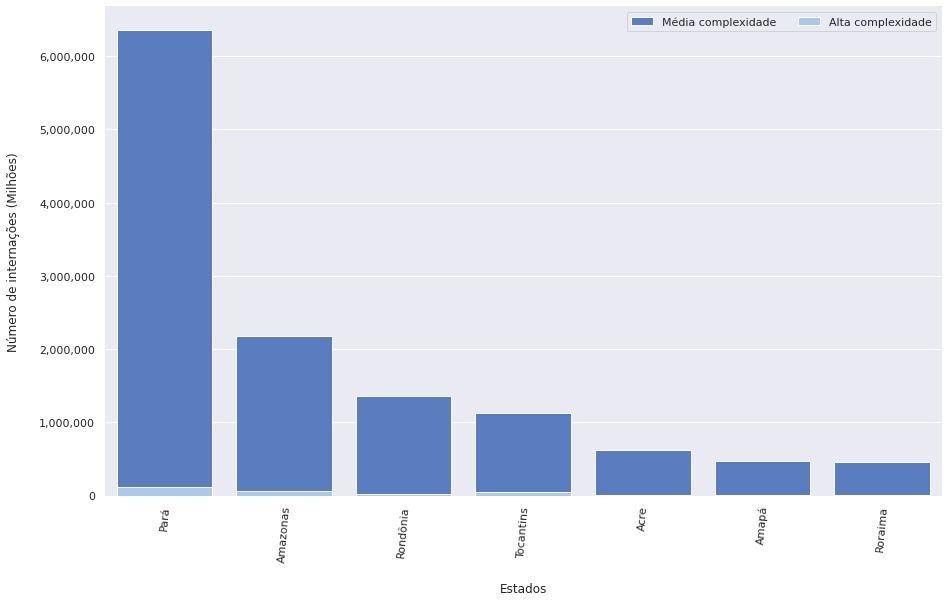

In [70]:
f3, ax3 = plt.subplots(figsize=(15, 9))

sns.set_color_codes("muted")
sns.barplot(data=norte_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=norte_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=norte_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=norte_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=norte_internacoes.index.tolist(), 
            y=norte_internacoes['Alta complexidade'].values, 
            color='b',
            label=norte_internacoes.columns[1])

plt.xticks(rotation=85)

ax3.legend(ncol=2, loc="upper right", frameon=True)
ax3.set(ylabel="Número de internações (Milhões)\n",
       xlabel="\nEstados")
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

plt.show()

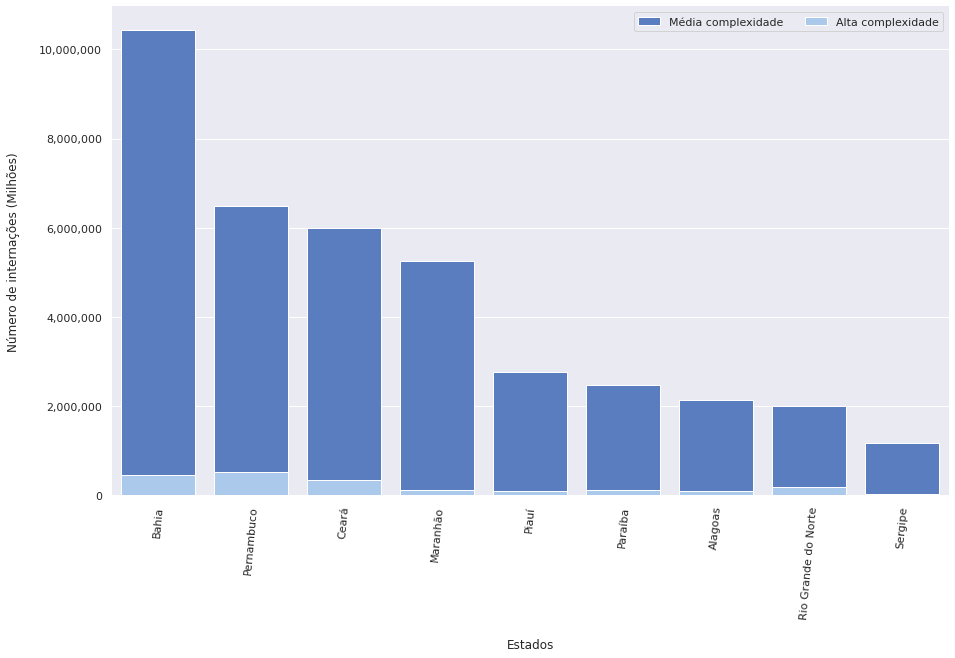

In [69]:
f4, ax4 = plt.subplots(figsize=(15, 9))

sns.set_color_codes("muted")
sns.barplot(data=nordeste_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=nordeste_internacoes.index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=nordeste_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=nordeste_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=nordeste_internacoes.index.tolist(), 
            y=nordeste_internacoes['Alta complexidade'].values, 
            color='b',
            label=nordeste_internacoes.columns[1])

plt.xticks(rotation=85)

ax4.legend(ncol=2, loc="upper right", frameon=True)
ax4.set(ylabel="Número de internações (Milhões)\n",
       xlabel="\nEstados")
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

plt.show()

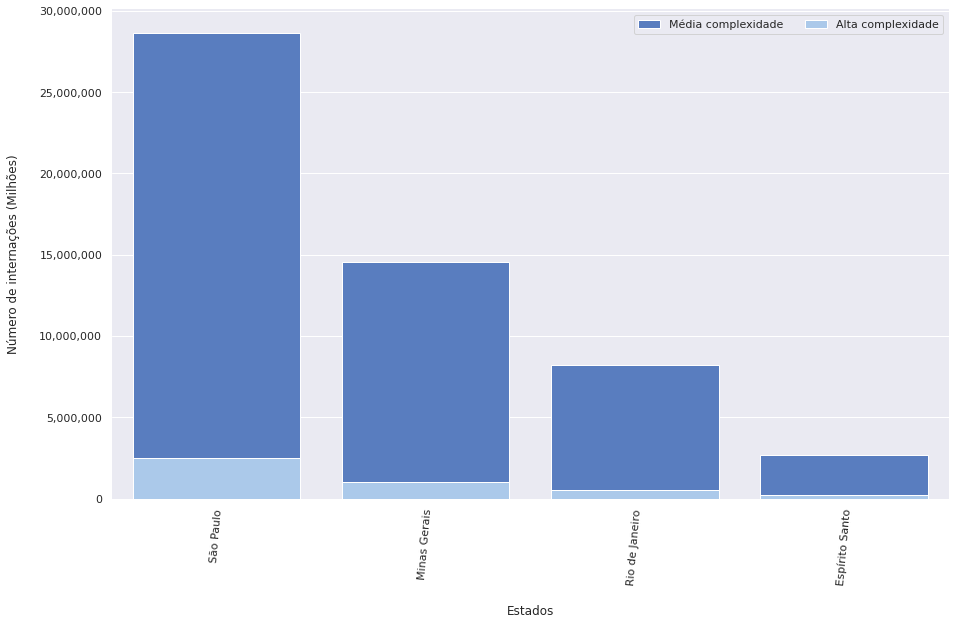

In [85]:
f5, ax5 = plt.subplots(figsize=(15, 9))

sns.set_color_codes("muted")
sns.barplot(data=sudeste_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=sudeste_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=sudeste_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=sudeste_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=sudeste_internacoes.index.tolist(), 
            y=sudeste_internacoes['Alta complexidade'].values, 
            color='b',
            label=sudeste_internacoes.columns[1])

plt.xticks(rotation=85)

ax5.legend(ncol=2, loc="upper right", frameon=True)
ax5.set(ylabel="Número de internações (Milhões)\n",
       xlabel="\nEstados")
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

plt.show()

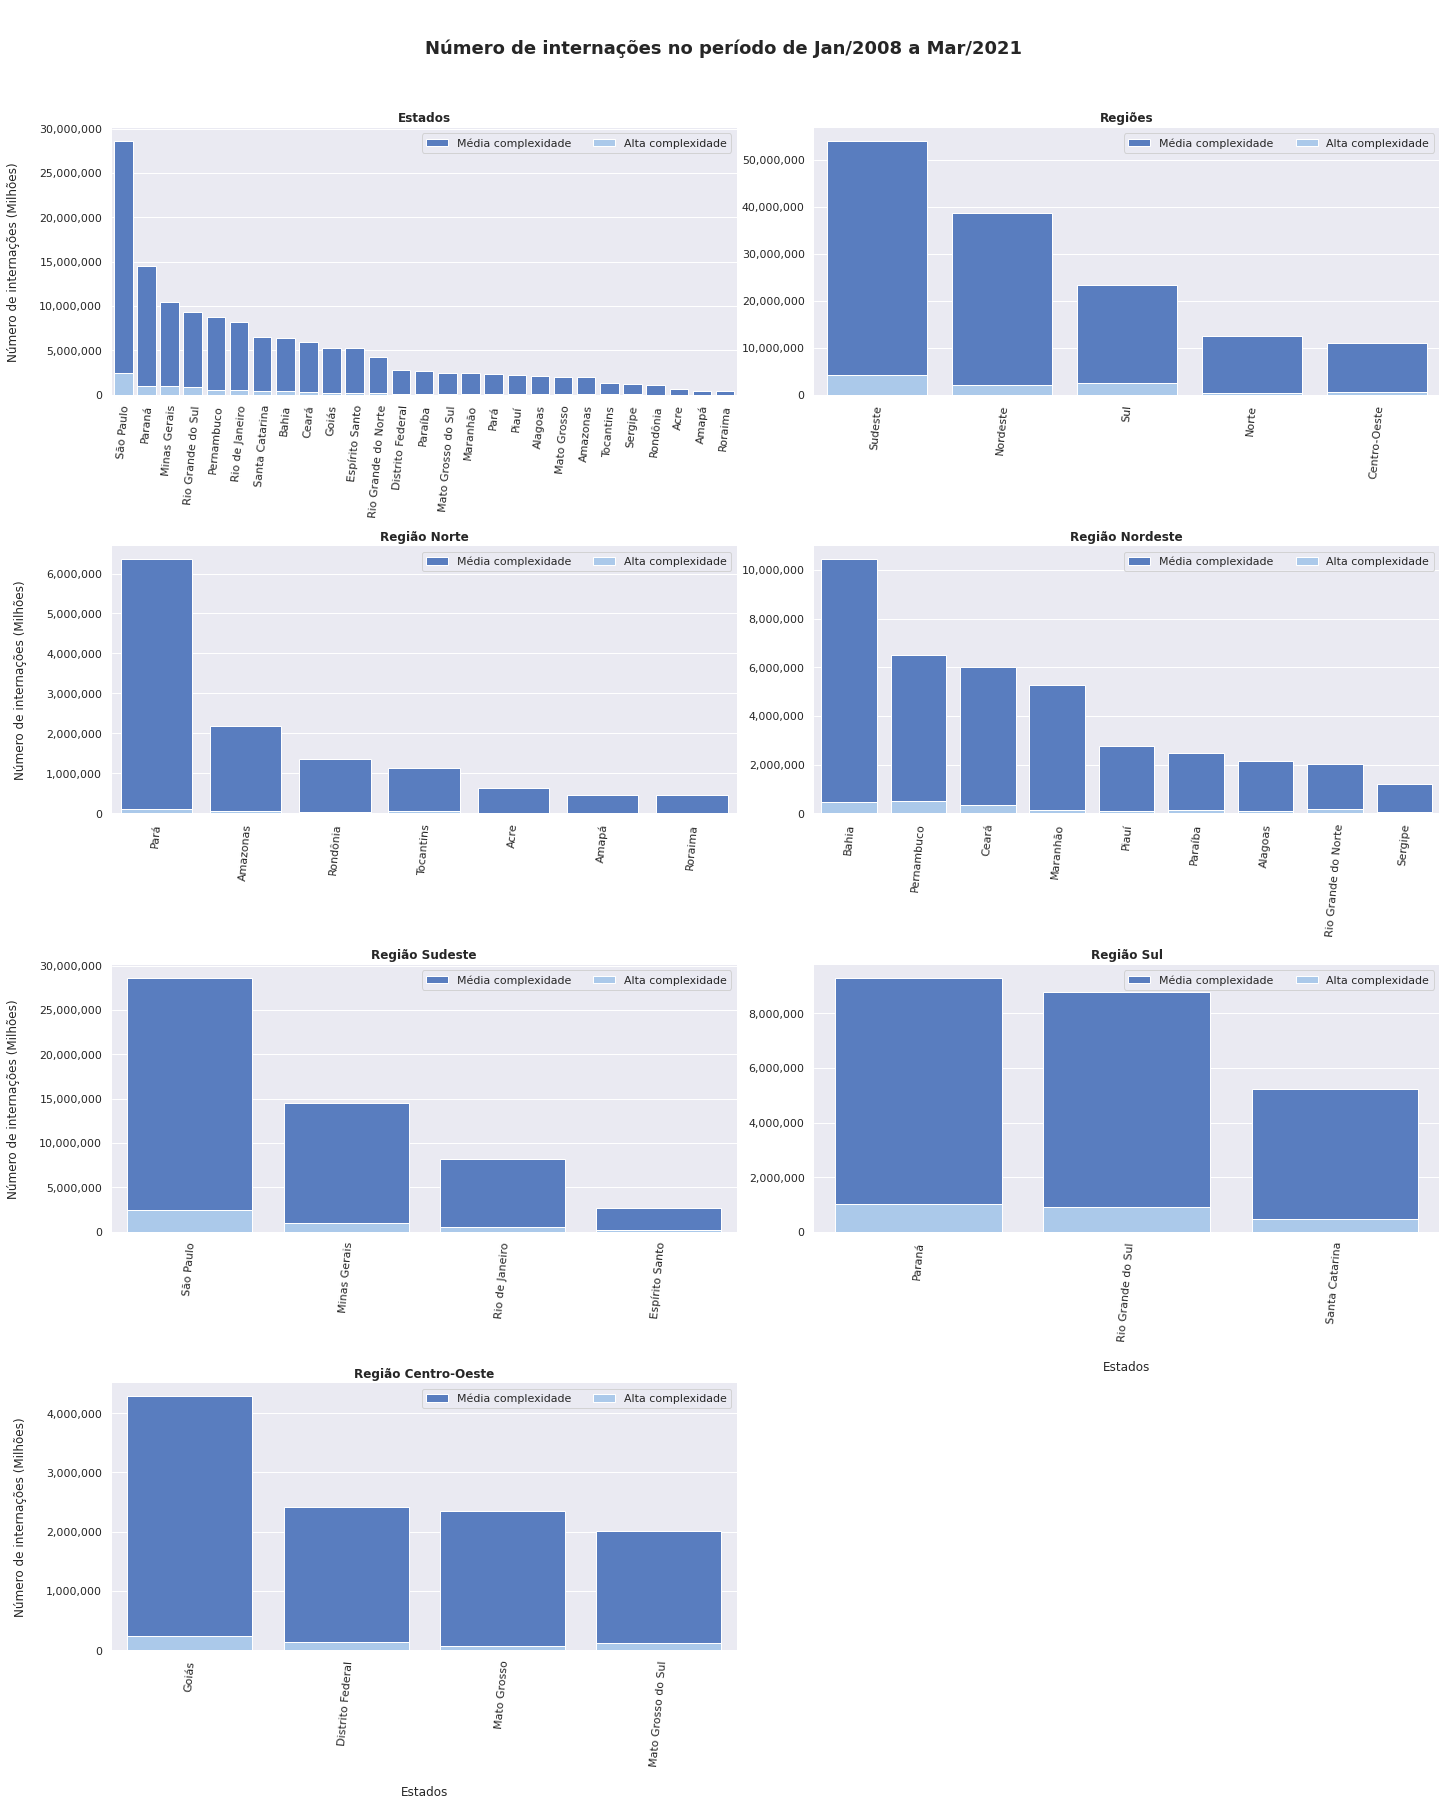

In [133]:
fig = plt.figure(figsize=(20,25))
fig.suptitle('Número de internações no período de Jan/2008 a Mar/2021', fontsize=18, weight='bold')

ax1 = fig.add_subplot(4,2,1)
sns.set_color_codes("muted")
sns.barplot(data=data.sort_values(by='Média complexidade', ascending=False), 
            x=data.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=data.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=data.sort_values(by='Alta complexidade', ascending=False), 
            x=data.sort_values(by='Alta complexidade', ascending=False).index.tolist(), 
            y='Alta complexidade', 
            color='b',
            label=data.columns[1])

plt.xticks(rotation=85)

ax1.legend(ncol=2, loc="upper right", frameon=True)
ax1.set_title('\n\n\n\n\n\n\nEstados', weight='bold')
ax1.set(ylabel="Número de internações (Milhões)\n",
       xlabel="")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)


ax2 = fig.add_subplot(4,2,2)
sns.set_color_codes("muted")
sns.barplot(data=regioes_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=regioes_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=internacoes_regiao.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=regioes_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=regioes_internacoes.index.tolist(), 
            y=regioes_internacoes['Alta complexidade'].values, 
            color='b',
            label=internacoes_regiao.columns[1])

plt.xticks(rotation=85)

ax2.legend(ncol=2, loc="upper right", frameon=True)
ax2.set(ylabel="",
       xlabel="")
ax2.set_title('Regiões', weight='bold')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)


ax3 = fig.add_subplot(4,2,3)
sns.set_color_codes("muted")
sns.barplot(data=norte_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=norte_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=norte_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=norte_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=norte_internacoes.index.tolist(), 
            y=norte_internacoes['Alta complexidade'].values, 
            color='b',
            label=norte_internacoes.columns[1])

plt.xticks(rotation=85)

ax3.legend(ncol=2, loc="upper right", frameon=True)
ax3.set(ylabel="Número de internações (Milhões)\n",
       xlabel="")
ax3.set_title('Região Norte', weight='bold')
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)


ax4 = fig.add_subplot(4,2,4)
sns.set_color_codes("muted")
sns.barplot(data=nordeste_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=nordeste_internacoes.index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=nordeste_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=nordeste_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=nordeste_internacoes.index.tolist(), 
            y=nordeste_internacoes['Alta complexidade'].values, 
            color='b',
            label=nordeste_internacoes.columns[1])

plt.xticks(rotation=85)

ax4.legend(ncol=2, loc="upper right", frameon=True)
ax4.set(ylabel="",
       xlabel="")
ax4.set_title('Região Nordeste', weight='bold')
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)


ax5 = fig.add_subplot(4,2,5)
sns.set_color_codes("muted")
sns.barplot(data=sudeste_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=sudeste_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=sudeste_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=sudeste_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=sudeste_internacoes.index.tolist(), 
            y=sudeste_internacoes['Alta complexidade'].values, 
            color='b',
            label=sudeste_internacoes.columns[1])

plt.xticks(rotation=85)

ax5.legend(ncol=2, loc="upper right", frameon=True)
ax5.set(ylabel="Número de internações (Milhões)\n",
       xlabel="")
ax5.set_title('Região Sudeste', weight='bold')
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)


ax6 = fig.add_subplot(4,2,6)
sns.set_color_codes("muted")
sns.barplot(data=sul_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=sul_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=sul_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=sul_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=sul_internacoes.index.tolist(), 
            y=sul_internacoes['Alta complexidade'].values, 
            color='b',
            label=sul_internacoes.columns[1])

plt.xticks(rotation=85)

ax6.legend(ncol=2, loc="upper right", frameon=True)
ax6.set(ylabel="",
       xlabel="\nEstados")
ax6.set_title('Região Sul', weight='bold')
ax6.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

ax7 = fig.add_subplot(4,2,7)
sns.set_color_codes("muted")
sns.barplot(data=centro_internacoes.sort_values(by='Média complexidade', ascending=False), 
            x=centro_internacoes.sort_values(by='Média complexidade', ascending=False).index.tolist(), 
            y='Média complexidade', 
            color='b',
            label=centro_internacoes.columns[0])

sns.set_color_codes("pastel")
sns.barplot(data=centro_internacoes.sort_values(by='Alta complexidade', ascending=False), 
            x=centro_internacoes.index.tolist(), 
            y=centro_internacoes['Alta complexidade'].values, 
            color='b',
            label=centro_internacoes.columns[1])

plt.xticks(rotation=85)

ax7.legend(ncol=2, loc="upper right", frameon=True)
ax7.set(ylabel="Número de internações (Milhões)\n",
       xlabel="\nEstados")
ax7.set_title('Região Centro-Oeste', weight='bold')
ax7.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.savefig('internacoes.png', dpi=300)

plt.show()

